> The main objective of this file is just to make a recommendation system :)

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

# Having the first look at the data

In [ ]:
data=pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

In [ ]:
data.head()

# Adding descriptions to the books

In [ ]:
data['Description']=np.load('../input/book-description/Book_description.npy')

# Having a look at the updated data

In [ ]:
data.head()

# Making A Function To Tokenize Description And Removing Stopwords

In [ ]:
# Filling all the empty/nan description rows with empty string
data['Description']=data['Description'].fillna('')

In [ ]:
# This function is to remove stopwords from a particular column and to tokenize it
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [ ]:
rem_stopwords_tokenize(data,'Description')

In [ ]:
# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

In [ ]:
lemmatize_all(data,'Description')

# Having a look at the updated data

In [ ]:
data['Description'].head()

**The data is lemmatized and tokenized now :)**

# Making a function for set recommendation

In [ ]:
def set_rec_finder(na,number):
    def intersection(lst1, lst2): 
        return list(set(lst1) & set(lst2)) 
    def find_rec(name):
        x=list(data[data['Name']==name]['Description'].values)[0]
        score=[]
        for i in range(len(data)):
            score.append([len(intersection(x,data['Description'].values[i])),data['Name'].values[i]])
        return score
    recommendations=find_rec(na)
    recommendations.sort(reverse=True)
    recommendations=np.array(recommendations)
    ans=recommendations[:number,1]
    for i in ans:
        print(i)

In [ ]:
set_rec_finder('Diary of a Wimpy Kid: Hard Luck, Book 8',10)

# So this is the recommendation system :)

# Hope you liked the file :)

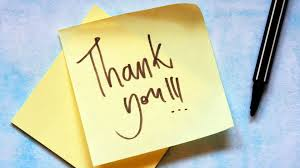